# Comparing the Performance of scikit-eLCS and the Original eLCS Algorithm

Author: Robert Zhang - Univeresity of Pennsylvania, B.S.E Computer Science, B.S.E. Economics (SEAS '22, WH '22)

Advisor: Ryan Urbanowicz, PhD - University of Pennsylvania, Department of Biostatics, Epidemiology, and Informatics & Institue for Biomedical Informatics (IBI)

Date: 04/05/2020

Notebook Requirements: (Python 3)
<ul>
    <li>scikit-eLCS</li>
    <li>pandas</li>
    <li>numpy</li>
    <li>scipy</li>
    <li>scikit-learn</li>
    <li>matplotlib</li>
</ul>

## Introduction
This notebook presents a comparison between the performance of the original eLCS Algorithm, as presented in the 2017 textbook "Introduction to Learning Classifier Systems" by Ryan Urbanowicz and Will Browne, and the new scikit-eLCS Python package.

The scikit-eLCS package is a sklearn compatible Python implementation of the original eLCS Algorithm. It was designed to perform equally well in terms of training/testing accuracy and training time, while being significantly more user friendly, and including an array of additional real time & post-training analysis tools. This notebook will demonstrate these capabilities in detail.

The scikit-eLCS source code and a complete walkthrough of its usage can be found at <a href=https://github.com/UrbsLab/scikit-eLCS>this Github Repository</a>. The package can be installed via **pip3 install scikit-eLCS**.

This notebook uses a slightly modified version of the original eLCS algorithm to improve useability, clarity, and to make it perform (runtime wise) more similar to the scikit-eLCS package, which would run slightly faster otherwise due to its lack of mandatory evaluation, printing, and exporting during training. Thus, this notebook is only comparing the runtime of the core algorithm implementations, rather than evaluating the runtimes of the two packages as a whole.
<ul>
    <li>Removed from original eLCS all print statements</li>
    <li>Removed from original eLCS all obligatory evaluation procedures during training</li>
    <li>Removed from original eLCS all export functionality during training</li>
    <li>Made training accuracy easier to access for original eLCS</li>
    <li>Removed the need for a config file (used param passing instead)</li>
    <li>Removed the need for both a test and train file, and made all files csv's instead of txt's</li>
</ul>

## Notebook Organization
**Part 0: Setting Up Some Helper Methods**

**Part 1: Comparing Training Accuracy and Runtime**
<ul>
    <li> 6-bit Multiplexer Problem </li>
    <li> 11-bit Multiplexer Problem </li>
    <li> 20-bit Multiplexer Problem </li>
</ul>

**Part 2: Comparing Testing Accuracy**
<ul>
    <li> 6-bit Multiplexer Problem </li>
    <li> 11-bit Multiplexer Problem </li>
    <li> 20-bit Multiplexer Problem </li>
</ul>

**Part 3: Quick Demo of Additional Analysis Tools Provided by scikit-eLCS**
<ul>
    <li> Iteration Tracking Tool </li>
    <li> Rule Population Tool </li>
    <li> Population Statistics Tools </li>
</ul>

## Part 0: Setting Up Helper Methods

In [1]:
from eLCS_Timer import Timer
from eLCS_ParamParser import ParamParser
from eLCS_Offline_Environment import Offline_Environment
from eLCS_Algorithm import eLCS
from eLCS_Constants import *
import numpy as np
import time

def runOriginaleLCS(dataFile,learningIterations,N,randomSeed,labelPhenotype="Class",nu=10,cv=False):
    #Run the e-LCS algorithm.
    if cv == False:
        ParamParser(dataFile,cv=cv,N=N,nu=nu,labelPhenotype=labelPhenotype,learningIterations=learningIterations,randomSeed=randomSeed)
        timer = Timer() 
        cons.referenceTimer(timer)
        env = Offline_Environment()
        cons.referenceEnv(env)
        cons.parseIterations()
        e = eLCS()
        return np.array([e.trainEval[0],cons.timer.globalTime])
    else:
        l = []
        ParamParser(dataFile,cv=cv,N=N,nu=nu,labelPhenotype=labelPhenotype,learningIterations=learningIterations,randomSeed=randomSeed)
        for i in range(cv):
            cons.setCV()
            timer = Timer() 
            cons.referenceTimer(timer)
            env = Offline_Environment()
            cons.referenceEnv(env)
            cons.parseIterations()
            e = eLCS()
            l.append(e.testEval[0])
        return np.mean(np.array(l))

import skeLCS
import pandas as pd
from sklearn.model_selection import cross_val_score

def runScikiteLCS(dataFile,learningIterations,N,randomSeed,classLabel="Class",nu=10,cv=False):
    data = pd.read_csv(dataFile)
    dataFeatures = data.drop(classLabel,axis=1).values
    dataPhenotypes = data[classLabel].values
    model = skeLCS.eLCS(learningIterations = learningIterations,randomSeed = randomSeed,N=N,nu=nu)

    if cv == False:
        model.fit(dataFeatures,dataPhenotypes)
        score = model.score(dataFeatures,dataPhenotypes)
        return np.array([score,model.timer.globalTime])
    else:
        formatted = np.insert(dataFeatures,dataFeatures.shape[1],dataPhenotypes,1)
        np.random.shuffle(formatted)
        dataFeatures = np.delete(formatted,-1,axis=1)
        dataPhenotypes = formatted[:,-1]
        return np.mean(cross_val_score(model,dataFeatures,dataPhenotypes,cv=cv))

randomSeeds = []
repeatCount = 30
for i in range(repeatCount):
    randomSeeds.append(i)

## Part 1: Comparing Training Accuracy and Runtime
We will use the n-bit Multiplexer Problem to test the training accuracy and runtime of the two eLCS implementations. The Multiplexer Problem is a benchmark LCS problem, due to its highly epistatic and heterogeneous nature.
<br>
<br>
<img src="MP.jpg">

We will use the same hyperparameters for both eLCS implementations, and also use the same random seed, to ensure the exact replicability (without a set random seed however, the results of analysis will still yield highly similar conclusions).

We will use a 500 instance dataset of the 6-bit multiplexer (i.e. there exists duplicate instances), with a maximium micropopulation of 500, with a nu = 10, over 10000 learning iterations.

We will use a 5000 instance dataset of the 11-bit multiplexer (i.e. there exists duplicate instances), with a maximium micropopulation of 1000, with a nu = 10, over 10000 learning iterations.

We will use a 10000 instance dataset of the 20-bit multiplexer, with a maximium micropopulation of 2000, with a nu = 10, over 10000 learning iterations.

### 6-bit Multiplexer Problem with Original eLCS

In [2]:
avgOriginal = np.array([0,0])
bit6TimeO = []
bit6TrAccO = []
for seed in randomSeeds:
    toAdd = runOriginaleLCS('Datasets/Multiplexer6.csv','10000',500,seed)
    bit6TimeO.append(toAdd[1])
    bit6TrAccO.append(toAdd[0])
    avgOriginal = np.add(avgOriginal,toAdd)
avgOriginal /= repeatCount

print("Average Training Accuracy: "+str(avgOriginal[0]))
print("Average Total Training Time: "+str(avgOriginal[1]))

Average Training Accuracy: 1.0
Average Total Training Time: 3.8205798864364624


### 6-bit Multiplexeer Problem with scikit-eLCS

In [3]:
avgScikit = np.array([0,0])
bit6TimeS = []
bit6TrAccS = []
for seed in randomSeeds:
    toAdd = runScikiteLCS('Datasets/Multiplexer6.csv',10000,500,seed)
    bit6TimeS.append(toAdd[1])
    bit6TrAccS.append(toAdd[0])
    avgScikit = np.add(avgScikit,toAdd)
avgScikit /= repeatCount

print("Average Training Accuracy: "+str(avgScikit[0]))
print("Average Total Training Time: "+str(avgScikit[1]))

Average Training Accuracy: 1.0
Average Total Training Time: 3.4941276868184405


### 11-bit Multiplexer Problem with Original eLCS

In [4]:
avgOriginal = np.array([0,0])
bit11TimeO = []
bit11TrAccO = []
for seed in randomSeeds:
    toAdd = runOriginaleLCS('Datasets/Multiplexer11.csv','10000',1000,seed)
    bit11TimeO.append(toAdd[1])
    bit11TrAccO.append(toAdd[0])
    avgOriginal = np.add(avgOriginal,toAdd)
avgOriginal /= repeatCount

print("Average Training Accuracy: "+str(avgOriginal[0]))
print("Average Total Training Time: "+str(avgOriginal[1]))

Average Training Accuracy: 0.99966
Average Total Training Time: 13.192320974667867


### 11-bit Multiplexer Problem with scikit-eLCS

In [5]:
avgScikit = np.array([0,0])
bit11TimeS = []
bit11TrAccS = []
for seed in randomSeeds:
    toAdd = runScikiteLCS('Datasets/Multiplexer11.csv',10000,1000,seed)
    bit11TimeS.append(toAdd[1])
    bit11TrAccS.append(toAdd[0])
    avgScikit = np.add(avgScikit,toAdd)
avgScikit /= repeatCount

print("Average Training Accuracy: "+str(avgScikit[0]))
print("Average Total Training Time: "+str(avgScikit[1]))

Average Training Accuracy: 1.0
Average Total Training Time: 14.77414456208547


### 20-bit Multiplexer Problem with Original eLCS

In [6]:
avgOriginal = np.array([0,0])
bit20TimeO = []
bit20TrAccO = []
for seed in randomSeeds:
    toAdd = runOriginaleLCS('Datasets/Multiplexer20.csv','10000',2000,seed)
    bit20TimeO.append(toAdd[1])
    bit20TrAccO.append(toAdd[0])
    avgOriginal = np.add(avgOriginal,toAdd)
avgOriginal /= repeatCount

print("Average Training Accuracy: "+str(avgOriginal[0]))
print("Average Total Training Time: "+str(avgOriginal[1]))

Average Training Accuracy: 0.9437333333333332
Average Total Training Time: 58.81030986309052


### 20-bit Multiplexer Problem with scikit-eLCS

In [7]:
avgScikit = np.array([0,0])
bit20TimeS = []
bit20TrAccS = []
for seed in randomSeeds:
    toAdd = runScikiteLCS('Datasets/Multiplexer20.csv',10000,2000,seed)
    bit20TimeS.append(toAdd[1])
    bit20TrAccS.append(toAdd[0])
    avgScikit = np.add(avgScikit,toAdd)
avgScikit /= repeatCount

print("Average Training Accuracy: "+str(avgScikit[0]))
print("Average Total Training Time: "+str(avgScikit[1]))

Average Training Accuracy: 0.942844066610743
Average Total Training Time: 61.18840057055156


### Summary of Results
Boxplots of Average Training Time and Average Training Accuracy with 6-bit, 11-bit, 20-bit multiplexer problems. Mann-Whitney U Tests for all 6 sets of data.

**Average Training Time**

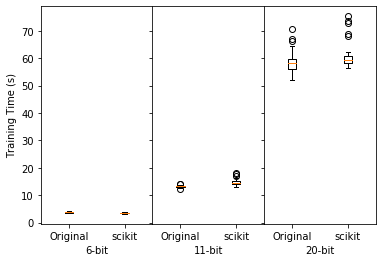

In [8]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(ncols=3,sharey=True)
fig.subplots_adjust(wspace=0)

A = [bit6TimeO,bit6TimeS]
B = [bit11TimeO,bit11TimeS]
C = [bit20TimeO,bit20TimeS]
data = {}
data['6-bit'] = A
data['11-bit'] = B
data['20-bit'] = C

for ax,name in zip(axes,['6-bit','11-bit','20-bit']):
    ax.boxplot([data[name][item] for item in [0, 1]])
    ax.set(xticklabels=['Original', 'scikit'], xlabel=name)
    ax.margins(0.05) # Optional
    if name == '6-bit':
        ax.set_ylabel('Training Time (s)')
plt.show()

**Average Training Accuracy**

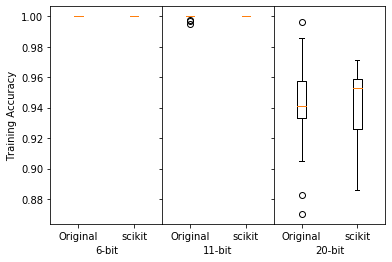

In [9]:
fig,axes = plt.subplots(ncols=3,sharey=True)
fig.subplots_adjust(wspace=0)

A = [bit6TrAccO,bit6TrAccS]
B = [bit11TrAccO,bit11TrAccS]
C = [bit20TrAccO,bit20TrAccS]

data = {}
data['6-bit'] = A
data['11-bit'] = B
data['20-bit'] = C

for ax,name in zip(axes,['6-bit','11-bit','20-bit']):
    ax.boxplot([data[name][item] for item in [0, 1]])
    ax.set(xticklabels=['Original', 'scikit'], xlabel=name)
    ax.margins(0.05) # Optional
    if name == '6-bit':
        ax.set_ylabel('Training Accuracy')
plt.show()

**Mann-Whitney U Tests**

In [10]:
from scipy.stats import mannwhitneyu

def domannwhitneyu(d1,d2):
    if np.sum(np.array(d1+d2))/(len(d1+d2)) == d1[0]:
        return "Test Aborted. All distribution values were: "+str(d1[0])
    else:
        return mannwhitneyu(d1,d2)[1]

print("6-bit Multiplexer training time (p-value):"+str(domannwhitneyu(bit6TimeO,bit6TimeS)))
print("11-bit Multiplexer training time (p-value):"+str(domannwhitneyu(bit11TimeO,bit11TimeS)))
print("20-bit Multiplexer training time (p-value):"+str(domannwhitneyu(bit20TimeO,bit20TimeS)))
print("6-bit Multiplexer training accuracy (p-value):"+str(domannwhitneyu(bit6TrAccO,bit6TrAccS)))
print("11-bit Multiplexer training accuracy (p-value):"+str(domannwhitneyu(bit11TrAccO,bit11TrAccS)))
print("20-bit Multiplexer training accuracy (p-value):"+str(domannwhitneyu(bit20TrAccO,bit20TrAccS)))

6-bit Multiplexer training time (p-value):2.7310164310611966e-06
11-bit Multiplexer training time (p-value):1.7485557588589827e-09
20-bit Multiplexer training time (p-value):0.010340374569989043
6-bit Multiplexer training accuracy (p-value):Test Aborted. All distribution values were: 1.0
11-bit Multiplexer training accuracy (p-value):0.040761486042059134
20-bit Multiplexer training accuracy (p-value):0.41512648077356346


## Part 2: Comparing Testing Accuracy
We will conduct a 3-fold CV 5 times (for 5 random seeds) for the 3 Multiplexer Problems above

### 6-bit Multiplexer Problem with Original eLCS

In [11]:
avgOriginal = 0
bit6TestO = []
for seed in randomSeeds:
    toAdd = runOriginaleLCS('Datasets/Multiplexer6.csv','10000',500,seed,cv=3)
    bit6TestO.append(toAdd)
    avgOriginal += toAdd
avgOriginal /= repeatCount

print("Average Testing Accuracy: "+str(avgOriginal))

Average Testing Accuracy: 0.9984007887838781


### 6-bit Multiplexer Problem with scikit-eLCS

In [12]:
avgScikit = 0
bit6TestS = []
for seed in randomSeeds:
    toAdd = runScikiteLCS('Datasets/Multiplexer6.csv',10000,500,seed,cv=3)
    bit6TestS.append(toAdd)
    avgScikit += toAdd
avgScikit /= repeatCount

print("Average Testing Accuracy: "+str(avgScikit))

Average Testing Accuracy: 1.0


### 11-bit Multiplexer Problem with Original eLCS

In [13]:
avgOriginal = 0
bit11TestO = []
for seed in randomSeeds:
    toAdd = runOriginaleLCS('Datasets/Multiplexer11.csv','10000',1000,seed,cv=3)
    bit11TestO.append(toAdd)
    avgOriginal += toAdd
avgOriginal /= repeatCount

print("Average Testing Accuracy: "+str(avgOriginal))

Average Testing Accuracy: 0.9996199119519834


### 11-bit Multiplexer Problem with scikit-eLCS

In [14]:
avgScikit = 0
bit11TestS = []
for seed in randomSeeds:
    toAdd = runScikiteLCS('Datasets/Multiplexer11.csv',10000,1000,seed,cv=3)
    bit11TestS.append(toAdd)
    avgScikit += toAdd
avgScikit /= repeatCount

print("Average Testing Accuracy: "+str(avgScikit))

Average Testing Accuracy: 0.9999739786625033


### 20-bit Multiplexer Problem with Original eLCS

In [15]:
avgOriginal = 0
bit20TestO = []
for seed in randomSeeds:
    toAdd = runOriginaleLCS('Datasets/Multiplexer20.csv','10000',2000,seed,cv=3)
    bit20TestO.append(toAdd)
    avgOriginal += toAdd
avgOriginal /= repeatCount

print("Average Testing Accuracy: "+str(avgOriginal))

Average Testing Accuracy: 0.9394967341165228


### 20-bit Multiplexer Problem with scikit-eLCS

In [16]:
avgScikit = 0
bit20TestS = []
for seed in randomSeeds:
    toAdd = runScikiteLCS('Datasets/Multiplexer20.csv',10000,2000,seed,cv=3)
    bit20TestS.append(toAdd)
    avgScikit += toAdd
avgScikit /= repeatCount

print("Average Testing Accuracy: "+str(avgScikit))

Average Testing Accuracy: 0.9333629446740069


### Summary of Results
Boxplots of Average Testing Accuracy with 6-bit, 11-bit, 20-bit multiplexer problems. Mann-Whitney U Tests for all 3 sets of data.

**Average Testing Accuracy**

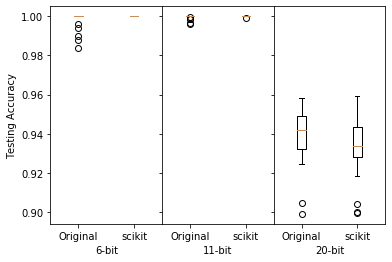

In [17]:
fig,axes = plt.subplots(ncols=3,sharey=True)
fig.subplots_adjust(wspace=0)

A = [bit6TestO,bit6TestS]
B = [bit11TestO,bit11TestS]
C = [bit20TestO,bit20TestS]

data = {}
data['6-bit'] = A
data['11-bit'] = B
data['20-bit'] = C

for ax,name in zip(axes,['6-bit','11-bit','20-bit']):
    ax.boxplot([data[name][item] for item in [0, 1]])
    ax.set(xticklabels=['Original', 'scikit'], xlabel=name)
    ax.margins(0.05) # Optional
    if name == '6-bit':
        ax.set_ylabel('Testing Accuracy')
plt.show()

**Mann-Whitney U Tests**

In [18]:
print("6-bit Multiplexer testing accuracy (p-value):"+str(domannwhitneyu(bit6TestO,bit6TestS)))
print("11-bit Multiplexer testing accuracy (p-value):"+str(domannwhitneyu(bit11TestO,bit11TestS)))
print("20-bit Multiplexer testing accuracy (p-value):"+str(domannwhitneyu(bit20TestO,bit20TestS)))

6-bit Multiplexer testing accuracy (p-value):0.010788595936416519
11-bit Multiplexer testing accuracy (p-value):0.041606273554397825
20-bit Multiplexer testing accuracy (p-value):0.036222797887118324


## Part 3: Quick Demo of Additional Analysis Tools Provided by scikit-eLCS
Aside from performing similarly to the original eLCS, scikit-eLCS provides a suite of learning tracking and evaluation tools that can be enabled and called during and after the training process. A subset of these tools can be found demoed briefly below. A full walkthrough of this tools can be found in the Jupyter Notebook within the <a href=https://github.com/UrbsLab/scikit-eLCS>scikit-eLCS Github repo</a>.

### Setup and Training of New scikit-eLCS Estimator

In [19]:
from skeLCS.DataCleanup import StringEnumerator
from skeLCS.eLCS import eLCS
import numpy as np

converter = StringEnumerator("DataSets/Multiplexer11.csv","Class")
headers,classLabel,dataFeatures,dataPhenotypes = converter.getParams()

formatted = np.insert(dataFeatures,dataFeatures.shape[1],dataPhenotypes,1)
np.random.shuffle(formatted)
dataFeatures = np.delete(formatted,-1,axis=1)
dataPhenotypes = formatted[:,-1]

model = eLCS(learningIterations = 5000,trackAccuracyWhileFit=True)
trainedModel = model.fit(dataFeatures,dataPhenotypes)

### Iteration Tracking Tool
Tracking or certain metrics is done during training. The following information to be saved at every iteration:
<ul>
    <li>Approximate Accuracy (if trackAccuracyWhileFit is True)li>
    <li>Macropopulation Size</li>
    <li>Micropopulation Size</li>
    <li>Match Set Size</li>
    <li>Correct Set Size</li>
    <li>Average iteration age (experience) of classifiers in correct set</li>
    <li>Number of classifiers subsumed in iteration</li>
    <li>Number of crossover operations performed in iteration (GA operation)</li>
    <li>Number of mutation operations performed in iteration (GA operation)</li>
    <li>Number of covering operations performed in iteration</li>
    <li>Number of macroclassifiers deleted in iteration</li>
    <li>Total training time</li>
    <li>Total matching time</li>
    <li>Total deletion time</li>
    <li>Total subsumption time</li>
    <li>Total selection time</li>
    <li>Total evaluation time</li>
</ul>
It also occasionally tracks average rule population generality. After training, as csv of this data can be exported.

In [20]:
trainedModel.exportIterationTrackingData("defaultExportDir/iterationData.csv")

This data can then be graphed.

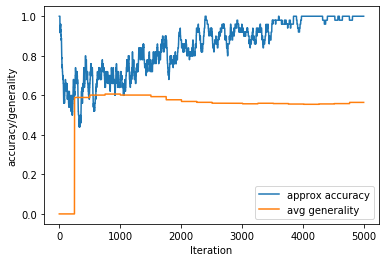

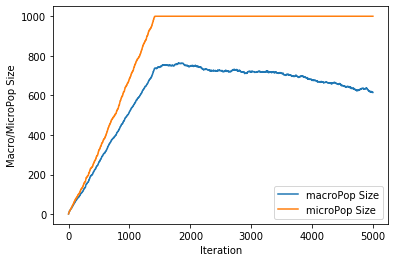

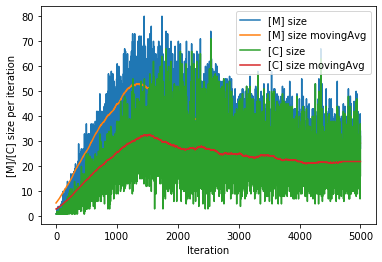

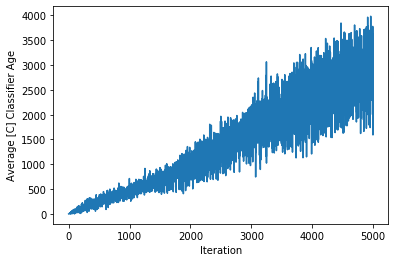

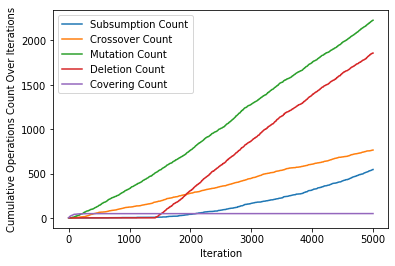

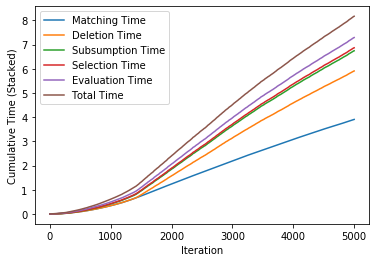

In [21]:
import matplotlib.pyplot as plt

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("defaultExportDir/iterationData.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

### Rule Population Tool
In addition to iteration tracking, scikit-eLCS allows you to export the rule population of the eLCS estimator at specified iterations (in either DCAL or traditional rule representation)

In [22]:
trainedModel.exportFinalRulePopulation(headers,classLabel,filename="defaultExportDir/fileRulePopulation.csv",DCAL=False)
display(pd.read_csv("defaultExportDir/fileRulePopulation.csv"))

,A_0,A_1,A_2,R_0,R_1,R_2,R_3,R_4,R_5,R_6,...,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,0.0,#,0.0,0.0,1.0,#,#,0.0,0.0,1.0,...,0.116029,0.650000,1,51.063220,4956,10,0.727273,0.000702,13,20
1,0.0,1.0,#,0.0,1.0,1.0,#,1.0,#,#,...,0.382182,0.825000,1,56.729599,4877,49,0.636364,0.000780,33,40
2,1.0,1.0,#,#,#,1.0,0.0,0.0,1.0,#,...,0.131687,0.666667,1,49.608832,4429,57,0.636364,0.000682,20,30
3,#,#,1.0,#,1.0,1.0,#,0.0,#,0.0,...,0.125912,0.660714,1,56.840326,4995,63,0.454545,0.000723,111,168
4,#,0.0,#,#,0.0,#,1.0,0.0,#,#,...,0.341108,0.806452,1,44.636660,4944,85,0.454545,0.000614,125,155
5,#,#,#,0.0,0.0,#,0.0,#,#,#,...,0.096036,0.625874,1,57.150463,4953,136,0.363636,0.000786,179,286
6,#,#,#,1.0,1.0,1.0,#,0.0,#,#,...,0.112685,0.646209,1,56.149476,4995,155,0.363636,0.000711,179,277
7,#,0.0,0.0,1.0,#,#,#,1.0,#,#,...,1.000000,1.000000,11,51.473342,4999,159,0.363636,0.007442,306,306
8,0.0,#,#,1.0,1.0,1.0,#,#,#,1.0,...,0.512909,0.875000,1,47.602691,4899,159,0.454545,0.000655,133,152
9,0.0,#,0.0,0.0,#,#,#,0.0,0.0,1.0,...,0.089888,0.617647,1,58.223821,4956,196,0.636364,0.000801,21,34
